/anaconda2/lib/python2.7/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/anaconda2/lib/python2.7/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


70696076.9884
21265250.3821
13185019.0782
7443751.53054
4974921.1419
3621825.19102
2633740.26479
1919957.87425
1491170.44293


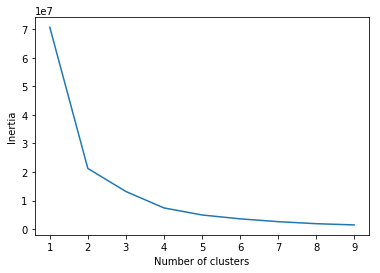

In [1]:
import read_clean
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from ggplot import *


# Getting the Data
X,y = read_clean.getCleanedData("data.csv")

###############################################
# Good Value of K
###############################################

# I used the elbow method to help me find the best value of k. 
#The idea is to choose a small value of k that still has a low SSE, and the elbow usually represents 
#where we start to have diminishing returns by increasing k. 

inertia = {}

for i in range(1,10):
    
    # Getting the Data
    X,y = read_clean.getCleanedData("data.csv")
        
    kmeans = KMeans(n_clusters = i, random_state = 1)
    kmeans = kmeans.fit(X)    
    inertia[i] = kmeans.inertia_
    print(kmeans.inertia_)
    
plt.figure()
plt.plot(list(inertia.keys()), list(inertia.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show() 

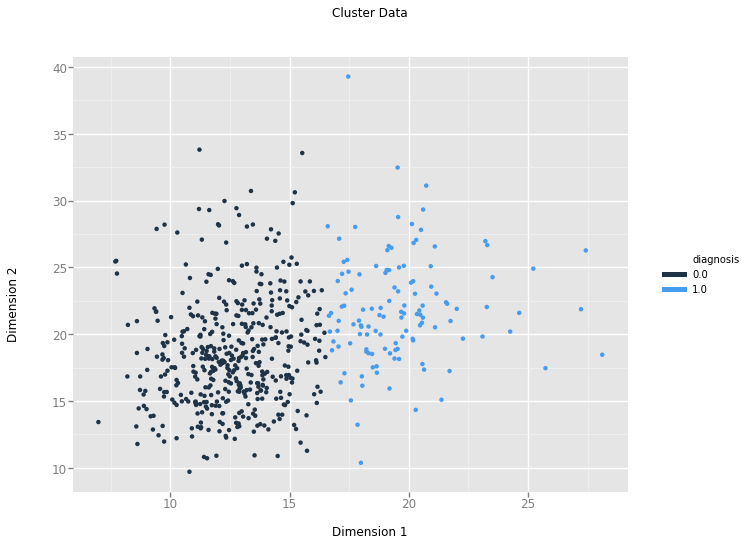

<ggplot: (7539815129)>

In [2]:
###############################################
# Visualizing Cluster data
###############################################

# As shown in the graph below, the elbow of the graph is 2. 
# So, 2 is a good value of K and it makes sense as the tumor is either malignant or benign

elbow = 2
X,y = read_clean.getCleanedData("data.csv")
        
kmeans = KMeans(n_clusters = elbow,  random_state = 3)
kmeans = kmeans.fit(X)  

y_kmeans = kmeans.predict(X)

# Converting X to a dataframe
X_predict_pd = pd.DataFrame(X)
# Appending y
X_predict_pd['diagnosis'] = y_kmeans
    
ggplot(aes(x=0 , y=1, color = 'diagnosis'), data= X_predict_pd) + geom_point() + xlab("Dimension 1") + ylab("Dimension 2") + ggtitle("Cluster Data")


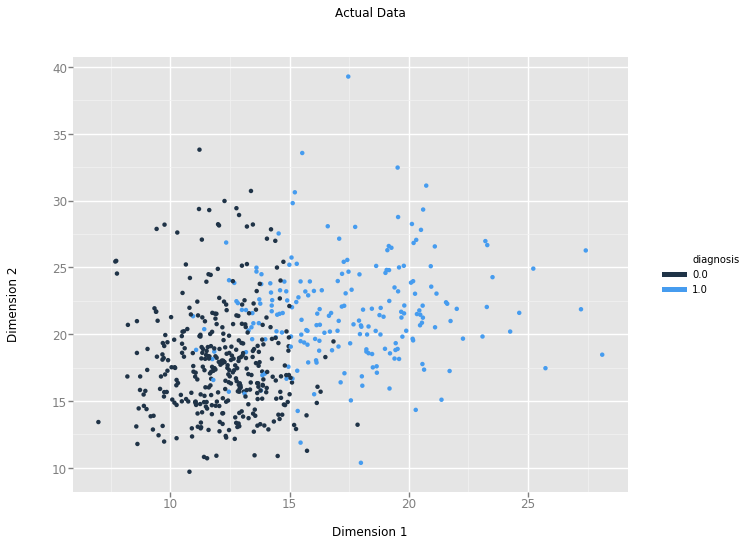

<ggplot: (7539124049)>

In [3]:
###############################################
# Visualizing Actual data
###############################################

# Malignant is denoted by 1 and Benign as -1 in the original dataset
# Converting benign to 0 

X,y = read_clean.getCleanedData("data.csv")
y = [0 if x == -1 else x for x in y]
    
# Converting X to a dataframe
X_pd = pd.DataFrame(X)
# Appending y
X_pd['diagnosis'] = y
    
ggplot(aes(x=0 , y=1, color = 'diagnosis'), data= X_pd) + geom_point() + xlab("Dimension 1") + ylab("Dimension 2") + ggtitle("Actual Data")


# K Fold Cross Validation

### Leave one out cross validation

In [145]:
import numpy as np
n = len(X)
d = len(X[0])

y_pred = np.zeros((n,1))
X,y = read_clean.getCleanedData("data.csv")

for i in range(n):
    all_except_i = range(i) + range(i+1,n)
    
    # Getting the Data
    X_train = X[all_except_i]
    y_train = [y[t] for t in all_except_i]
    
    # K Means
    kmeans = KMeans(n_clusters = 2, random_state = 3)
    kmeans = kmeans.fit(X_train) 
    
    testB = [[   6.981  ,   13.43   ,   43.79   ,  143.5    ,    0.117  ,
          0.07568,    0.     ,    0.     ,    0.193  ,    0.07818]]
        
    testM = [[   28.11   ,    18.47   ,   188.5    ,  2499.     ,     0.1142 ,
           0.1516 ,     0.3201 ,     0.1595 ,     0.1648 ,     0.05525]]
        
    benign = kmeans.predict(testB)
    malignant = kmeans.predict(testM)
    
    val = kmeans.predict([X[i]])
    
    if val == benign:
        y_pred[i] = -1
    elif val == malignant:
        y_pred[i] = 1

count = 0
for i in range(len(y)):
    if y[i] == y_pred[i]:
        count = count + 1
        
print(count/float(len(y)))

0.836555360281


### Chance

In [144]:
# Malignant is denoted by 1 and Benign as -1 in the original dataset
# Converting benign to 0 

X,y = read_clean.getCleanedData("data.csv")
y = [0 if x == -1 else x for x in y]

total = len(y)
malignant =  sum(y)
benign = total - malignant

print(total, malignant, benign)

# Classifier that predicts Benign always
print(float(malignant)/total)

# Classifier that predicts malignant always
print(float(benign)/total)

# Thus, this is not a useful method as the error is greater than 0.37%

(569, 212, 357)
0.372583479789
0.627416520211


## Bootstrapping

In [3]:
import numpy as np
import read_clean as dataCollector
from sklearn.cluster import KMeans

def bootstrapping(B, X, y):
    
    n, d = X.shape
    bs_err = np.zeros(B)

    for b in range(B):
        train_samples = list(np.random.randint(0, n, n))
        test_samples = list(set(range(n)) - set(train_samples))
        
        # K Means - Training
        kmeans = KMeans(n_clusters = 2)
        kmeans = kmeans.fit(X[train_samples]) 
    
        # K Means - Testing
        testSet = X[test_samples]
        testLabels = y[test_samples]
        n2, d2 = testSet.shape
        ttc = 0
        cc = 0
        
        testB = [[   6.981  ,   13.43   ,   43.79   ,  143.5    ,    0.117  ,
          0.07568,    0.     ,    0.     ,    0.193  ,    0.07818]]
        
        testM = [[   28.11   ,    18.47   ,   188.5    ,  2499.     ,     0.1142 ,
           0.1516 ,     0.3201 ,     0.1595 ,     0.1648 ,     0.05525]]
        
        benign = kmeans.predict(testB)
        malignant = kmeans.predict(testM)
        
        for j in xrange(n2):
            # extract the test point and test label
            test_point = testSet[j, :].T
            test_label = testLabels[j]
            # count if the test was good or not
            val = kmeans.predict(test_point.reshape(1, -1))
            
            if val == benign:
                val = -1
            elif val == malignant:
                val = 1
            
            if val == test_label:
                cc += 1
            ttc += 1
        bs_err[b] = float(cc)/float(ttc)
    return bs_err


def main():
    #  extract the data and the labels
    X, y = dataCollector.getCleanedData("data.csv")
    n, d = X.shape

    # create a dataset with the labels and the data mixed together
    bs_correct = bootstrapping(5, X, y)
    print 'B = 5 individual correctness'
    print bs_correct
    print 'B = 5 average correctness'
    print np.mean(bs_correct)
    
    
    # create a dataset with the labels and the data mixed together
    bs_correct = bootstrapping(10, X, y)
    print 'B = 10 individual correctness'
    print bs_correct
    print 'B = 10 average correctness'
    print np.mean(bs_correct)
    
    # create a dataset with the labels and the data mixed together
    bs_correct = bootstrapping(20, X, y)
    print 'B = 20 individual correctness'
    print bs_correct
    print 'B = 20 average correctness'
    print np.mean(bs_correct)


main()

B = 5 individual correctness
[ 0.83962264  0.85514019  0.84390244  0.85714286  0.81818182]
B = 5 average correctness
0.842797988555
B = 10 individual correctness
[ 0.82325581  0.83414634  0.82857143  0.865       0.83809524  0.82211538
  0.85333333  0.84951456  0.82380952  0.815     ]
B = 10 average correctness
0.835284162695
B = 20 individual correctness
[ 0.82432432  0.84331797  0.88073394  0.84782609  0.86320755  0.80769231
  0.82142857  0.85365854  0.82926829  0.8030303   0.82439024  0.83495146
  0.85576923  0.80930233  0.84037559  0.83628319  0.88181818  0.8364486
  0.855       0.84722222]
B = 20 average correctness
0.83980244593


## K Fold Cross Validation

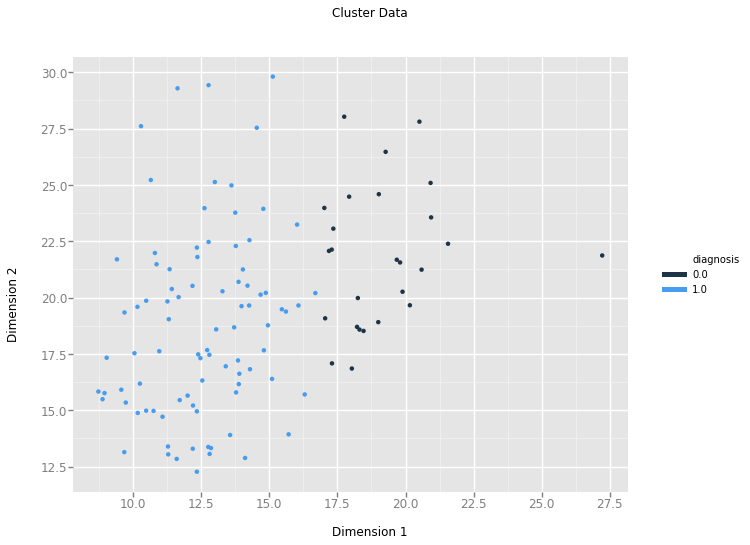

<ggplot: (7537701289)>
tp, tn, fp, fn
26 71 0 16



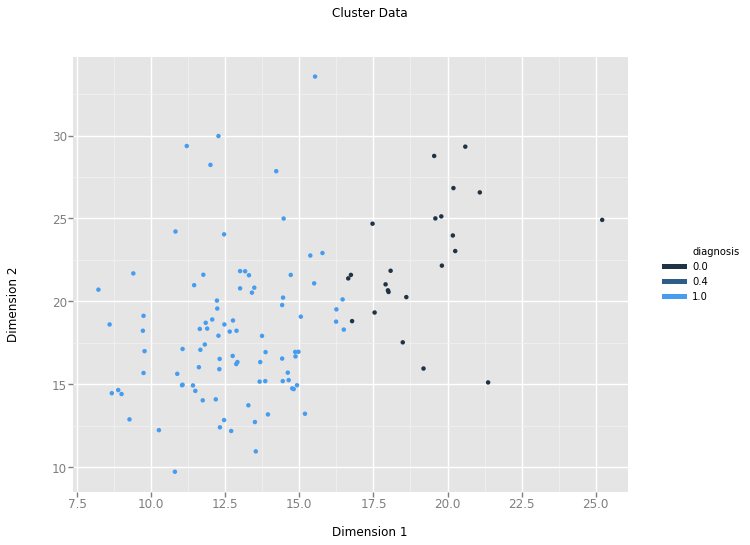

<ggplot: (6999370729)>
tp, tn, fp, fn
23 71 0 19



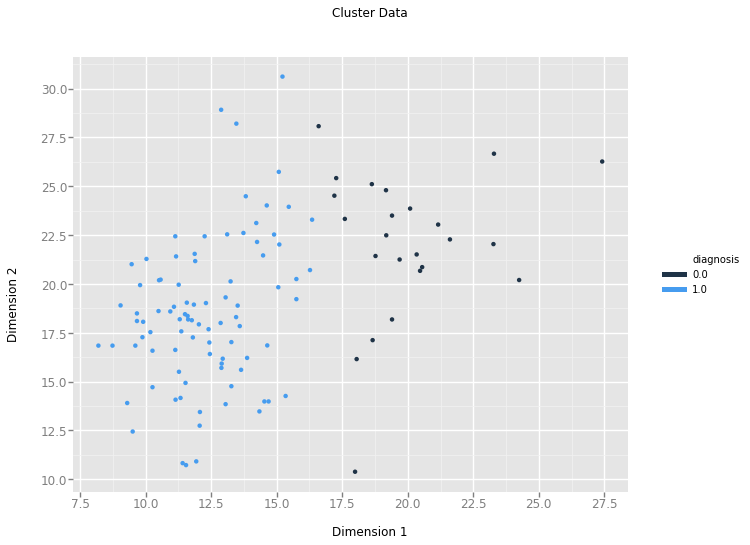

<ggplot: (7538053293)>
tp, tn, fp, fn
24 71 0 18



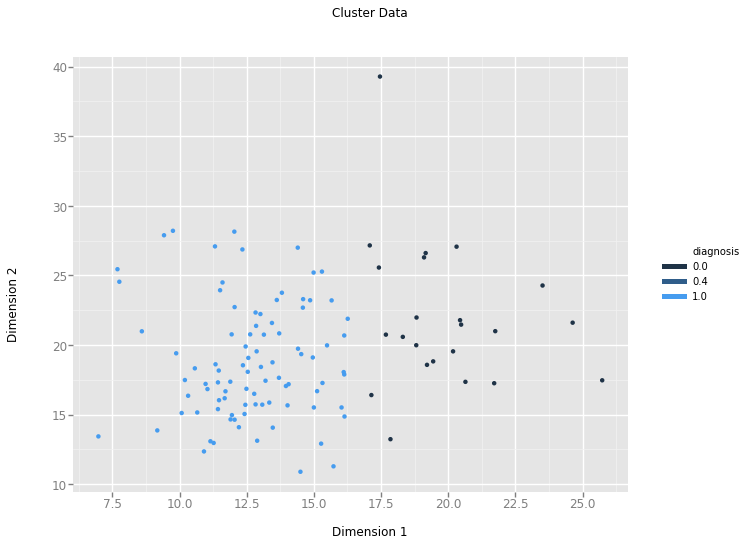

<ggplot: (6999370665)>
tp, tn, fp, fn
22 70 1 20



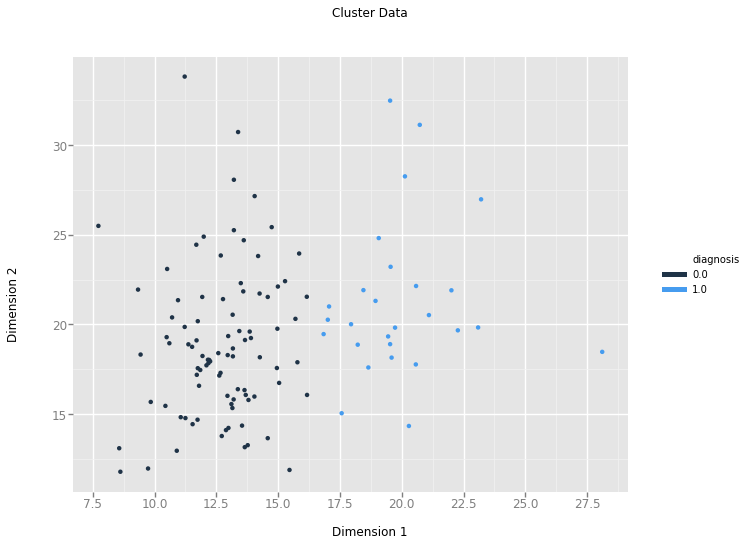

<ggplot: (282533853)>
tp, tn, fp, fn
26 72 1 18

accuracy
[ 0.85840708  0.83185841  0.84070796  0.81415929  0.83760684]
error
[ 0.14159292  0.16814159  0.15929204  0.18584071  0.16239316]
recall
[ 0.61904762  0.54761905  0.57142857  0.52380952  0.59090909]
precision
[ 1.          1.          1.          0.95652174  0.96296296]
specificity
[ 1.          1.          1.          0.98591549  0.98630137]
mean accuracy
0.836547916194
mean error
0.163452083806
mean recall
0.570562770563
mean precision
0.983896940419
mean specificity
0.994443372564


In [22]:
import sys
import numpy as np
import pandas as pd
import read_clean as dataCollector
from sklearn.cluster import KMeans
from ggplot import *
from random import shuffle, seed

#  Split a dataset into k folds
def cross_validation_split(y, folds=3):
    seed(1)
    # breaking up the labels into positive labels and negative labels to
    # evenly distribute them
    y_positive = list(np.where(y == 1)[0])
    y_negative = list(np.where(y == -1)[0])

    # getting the size of the respective arrays
    # n_p is number of positives
    # n_n is number of negatives
    n_p = int(len(y_positive)/folds)
    n_n = int(len(y_negative)/folds)

    shuffle(y_negative)
    shuffle(y_positive)

    # creating a 2d array
    split = []
    for i in xrange(folds):
        split.append([])

    k = folds

    # filling the ten folds with indices such that positives and
    # negatives are evenly distributed
    for i in range(0, k-1):
        split[i] += y_positive[i*n_p: (i+1)*n_p]
        split[i] += y_negative[i*n_n: (i+1)*n_n]

    split[k-1] += y_positive[(k-1)*n_p:]
    split[k-1] += y_negative[(k-1)*n_n:]

    return split


def cross_validation(X, y, foldcount):

    accuracy = np.zeros(foldcount)
    precision = np.zeros(foldcount)
    recall = np.zeros(foldcount)
    specificity = np.zeros(foldcount)
    n, d = X.shape
    
    y_predicted = np.zeros((n,1))

    # extract k folds from the data
    split = cross_validation_split(y, foldcount)

    # running k fold x validation
    for j in xrange(foldcount):

        # breaking up the folds into train and test
        trainInd = []
        testInd = split[j]
        for i in xrange(foldcount):
            if j == i:
                continue
            trainInd += split[i]

        # construct the training and testing sets
        trainSet = X[trainInd]
        trainLabels = y[trainInd]

        testSet = X[testInd]
        testLabels = y[testInd]

        # K Means - Training
        kmeans = KMeans(n_clusters = 2, random_state =3)
        kmeans = kmeans.fit(trainSet) 

        n = len(testInd)
        # Matt is terrible
        
        testB = [[   6.981  ,   13.43   ,   43.79   ,  143.5    ,    0.117  ,
          0.07568,    0.     ,    0.     ,    0.193  ,    0.07818]]
        
        testM = [[   28.11   ,    18.47   ,   188.5    ,  2499.     ,     0.1142 ,
           0.1516 ,     0.3201 ,     0.1595 ,     0.1648 ,     0.05525]]
        
        benign = kmeans.predict(testB)
        malignant = kmeans.predict(testM)

        # getting information on the statistical results
        tp = 0
        tn = 0
        fp = 0
        fn = 0
        
        y_kmeans = kmeans.predict(testSet)

        # Converting X to a dataframe
        X_predict_pd = pd.DataFrame(testSet)
        # Appending y
        X_predict_pd['diagnosis'] = y_kmeans
    
        print(ggplot(aes(x=0 , y=1, color = 'diagnosis'), data= X_predict_pd) + geom_point() + xlab("Dimension 1") + ylab("Dimension 2") + ggtitle("Cluster Data"))



        for i in xrange(n):
            # extract the test point and test label
            test_point = testSet[i]
            test_label = testLabels[i]
            # count if the test was good or not

            # test the model
            val = kmeans.predict(test_point.reshape(1, -1))
            
            if val == benign:
                val = -1
            elif val == malignant:
                val = 1
                
            testResult = val
                
            if testResult == 1 and test_label == 1:
                tp += 1
            if testResult == 1 and test_label == -1:
                fp += 1
            if testResult == -1 and test_label == 1:
                fn += 1
            if testResult == -1 and test_label == -1:
                tn += 1

        # making sure there are no zero denominators
        # probably unnecessary but just in case
        print 'tp, tn, fp, fn'
        print tp, tn, fp, fn
        print ''

        try:
            accuracy[j] = float(tp + tn) / float(fn + fp + tp + tn)
        except ZeroDivisionError:
            accuracy[j] = 0.0

        try:
            recall[j] = float(tp) / float(tp+fn)
        except ZeroDivisionError:
            recall[j] = 0.0

        try:
            precision[j] = float(tp) / float(tp+fp)
        except ZeroDivisionError:
            precision[j] = 0.0

        try:
            specificity[j] = float(tn) / float(tn+fp)
        except ZeroDivisionError:
            specificity[j] = 0.0

        error = np.ones(foldcount)
        error -= accuracy

    return accuracy, error, recall, precision, specificity


def k_fold(m):

    try:
        folds = m
    except IndexError:
        print 'Please list the number of folds for cross validation'
        print 'as a command line argument, for example : python cv.py 10'
        quit()

    #  extract the data and the labels
    X, y = dataCollector.getCleanedData("data.csv")
    # initializing output labels
    acc, err, recall, precision, specificity = cross_validation(X, y, folds)

    print 'accuracy'
    print acc
    print 'error'
    print err
    print 'recall'
    print recall
    print 'precision'
    print precision
    print 'specificity'
    print specificity

    print 'mean accuracy'
    print np.mean(acc)
    print 'mean error'
    print np.mean(err)
    print 'mean recall'
    print np.mean(recall)
    print 'mean precision'
    print np.mean(precision)
    print 'mean specificity'
    print np.mean(specificity)

k_fold(5)